In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans

In [27]:
from utils.data_loader import CrashDataLoader 

In [28]:
data_loader = CrashDataLoader()

Loading data from: 
./data/2000 to 2005 ACCIDENT
./data/ACCIDENT


In [29]:
person_df = data_loader.load_file("PERSON.csv")
person_df["inj_level"] = pd.to_numeric(person_df["inj_level"], errors="coerce")
person_df = person_df.dropna(subset=["inj_level"])
person_df["inj_level"] = person_df["inj_level"].astype('int32')
person_df.shape

C:\Work\job\blunomy\utils\data_loader.py:11: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(Path(folder_path) / file_name) for folder_path in self.path_list]
C:\Work\job\blunomy\utils\data_loader.py:11: DtypeWarning: Columns (6,9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(Path(folder_path) / file_name) for folder_path in self.path_list]


(759976, 17)

In [30]:
accident_df = data_loader.load_file("ACCIDENT.csv")
hospital_distance_df = pd.read_csv("./data/NodeHospitalDistance.csv")

C:\Work\job\blunomy\utils\data_loader.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(Path(folder_path) / file_name) for folder_path in self.path_list]
C:\Work\job\blunomy\utils\data_loader.py:11: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(Path(folder_path) / file_name) for folder_path in self.path_list]


### Calculate hospital distance to nodes

In [31]:
from ast import literal_eval
hospital_df =  pd.read_csv("./data/MainHospitalList.csv")
hospital_df.columns = hospital_df.columns.str.lower()
hospital_df["coordinate"] = hospital_df["coordinate"].apply(literal_eval)
hospital_df

,hospital id,formal name,other name,emergency capable,location address,suburb,postcode,access point,category,agency type,coordinate
0,3485,Albury Wodonga Health,Albury Wodonga Health,YES,69 Vermont Street,Wodonga,3690,NaN,PUBLIC,Public Hospital,"(-36.13197319158869, 146.87986370493027)"
1,12990,"Albury Wodonga Health, Albury Campus","Albury Wodonga Health, Albury Campus",YES,Borella,Albury,2640,NaN,PUBLIC,Public Hospital,"(-36.07861244230171, 146.9377196986903)"
2,3483,Angliss Hospital,Angliss Hospital,YES,Albert Street,Upper Ferntree Gully,3156,NaN,PUBLIC,Public Hospital,"(-37.89872650532987, 145.31367643087236)"
3,11733,Austin Health - Austin Hospital,Austin Health - Austin Hospital,YES,145 Studley Road,Heidelberg,3084,NaN,PUBLIC,Public Hospital,"(-37.75626108952502, 145.05861716827758)"
4,6272,Bairnsdale Regional Health Service,Bairnsdale Regional Health Service,YES,122 Day St,Bairnsdale,3875,NaN,PUBLIC,Public Hospital,"(-37.83120857196654, 147.60778589711597)"
5,10441,Barwon Health,Barwon Health,YES,272-322 Ryrie Street,Geelong,3220,NaN,PUBLIC,Public Hospital,"(-38.151234270930864, 144.36562229920983)"
6,3292,Bendigo Health,Bendigo Health,YES,62 Lucan St,Bendigo,3550,NaN,PUBLIC,Public Hospital,"(-36.74962823726239, 144.28077224034632)"
7,3403,Box Hill Hospital,Box Hill Hospital,YES,51 Nelson Road,Box Hill,3128,NaN,PUBLIC,Public Hospital,"(-37.81357762374263, 145.11829842595031)"
8,12280,Casey Hospital,Casey Hospital,YES,52 Kangan Drive,Berwick,3806,NaN,PUBLIC,Public Hospital,"(-38.04500177191388, 145.3475725971249)"
9,11269,Central Gippsland Health Service,Central Gippsland Health Service,YES,155 Guthridge Parade,Sale,3850,NaN,PUBLIC,Public Hospital,"(-38.10874530371505, 147.08078559449058)"


In [32]:
node_df = data_loader.load_file("NODE.csv")
node_df = node_df.drop_duplicates(subset=["node_id"])
node_df["coordinate"] = list(zip(node_df.lat, node_df.long))
node_df

C:\Work\job\blunomy\utils\data_loader.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(Path(folder_path) / file_name) for folder_path in self.path_list]


,accident_no,node_id,node_type,amg_x,amg_y,lga_name,region name,deg urban name,lat,long,postcode no,vicgrid94_x,vicgrid94_y,lga_name_all,region_name,deg_urban_name,postcode_no,coordinate
0,12000000389,25264,N,2512514.427,2388780.839,DANDENONG,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-38.002110,145.142480,3173.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-38.00211, 145.14248)"
1,12000000554,42800,I,2506548.994,2392856.260,KINGSTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.965450,145.074530,3192.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.96545, 145.07453)"
2,12000000555,40101,I,2498299.136,2404214.048,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Metropolitan Excluding CBD,-37.863140,144.980670,3182.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.86314, 144.98067)"
3,12000000559,127638,N,2500115.047,2395234.944,BAYSIDE,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.944040,145.001310,3188.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.94404, 145.00131)"
4,12000000586,57539,I,2505935.803,2401836.040,STONNINGTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.884550,145.067480,3145.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.88455, 145.06748)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326407,T20090046284,229107,N,NaN,NaN,WHITTLESEA,NaN,NaN,-37.676468,145.050491,NaN,2504453.781,2424931.347,WHITTLESEA,METROPOLITAN NORTH WEST REGION,MELB_URBAN,3082.0,"(-37.67646811, 145.0504909)"
326408,T20090046106,229103,N,NaN,NaN,WHITTLESEA,NaN,NaN,-37.645401,144.991064,NaN,2499211.462,2428380.388,WHITTLESEA,METROPOLITAN NORTH WEST REGION,MELB_URBAN,3076.0,"(-37.64540054, 144.9910643)"
326410,T20090047746,229114,N,NaN,NaN,BOROONDARA,NaN,NaN,-37.791877,145.093559,NaN,2508240.178,2412119.954,BOROONDARA,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,3104.0,"(-37.79187719, 145.0935586)"
326411,T20090044445,229087,N,NaN,NaN,INDIGO,NaN,NaN,-36.092861,146.702041,NaN,2653269.886,2599283.209,INDIGO,NORTH EASTERN REGION,RURAL_VICTORIA,3688.0,"(-36.09286128, 146.7020407)"


In [33]:
import geopy.distance as geo_distance
def get_min_hospital_distance(row, hospital_df = hospital_df):
    hospital_id_list = list(hospital_df["hospital id"])
    hospital_coor_list = list(hospital_df["coordinate"])
    
    min_distance, min_hospital_id = None, -1

    try:
        for h_id,h_coor in zip(hospital_id_list, hospital_coor_list):
            _distance = geo_distance.distance(row["coordinate"],h_coor).km
            if min_distance is None or _distance < min_distance:
                min_hospital_id = h_id
                min_distance = _distance
        return min_hospital_id, min_distance
    except:
        return -1, -1

In [34]:

# tqdm.pandas(desc='Calculating distance to ER')
# node_df[["hospital_id","hospital_distance"]] = node_df.progress_apply(lambda row: get_min_hospital_distance(row), axis=1, result_type="expand")
# node_df["hospital_id"] = node_df["hospital_id"].astype("int64")

# Write to csv
# node_df[["node_id","hospital_id","hospital_distance"]].sort_values("node_id").to_csv("./data/NodeHospitalDistance.csv",index=False)

In [35]:
injury_df = person_df[["accident_no","inj_level"]].groupby(by=["accident_no"]).min()
injury_df = injury_df.join(accident_df[["accident_no","node_id"]].set_index("accident_no")).join(hospital_distance_df.set_index("node_id"), on="node_id")


<Axes: title={'center': 'hospital_distance'}, xlabel='[inj_level]'>

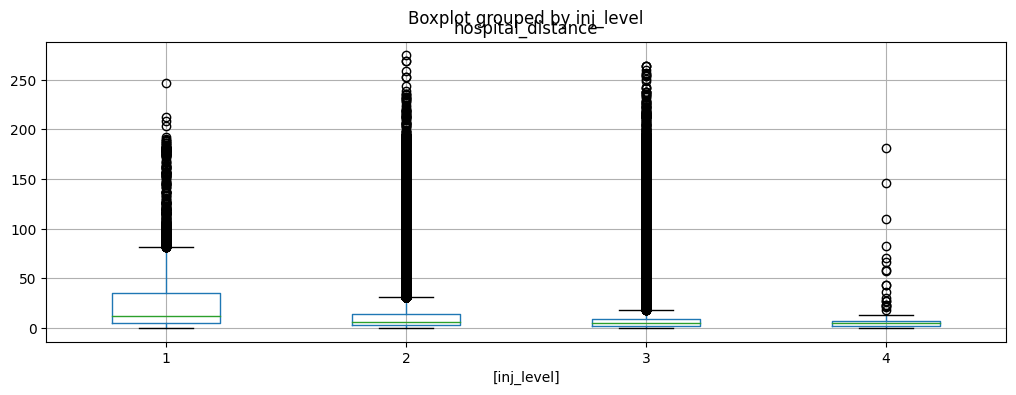

In [36]:
injury_df.boxplot(column=["hospital_distance"], by=["inj_level"])

In [37]:
plt.rcParams['figure.figsize'] = [12, 4]

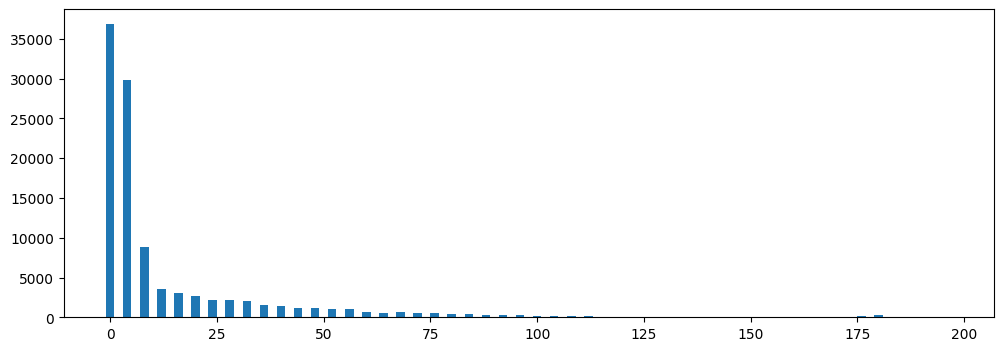

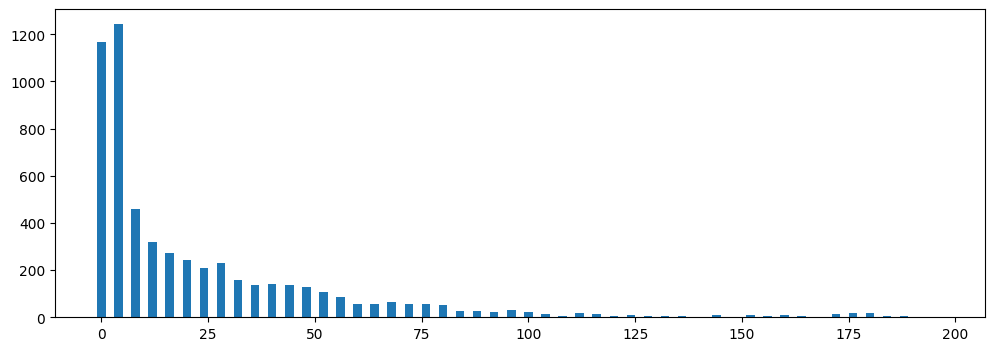

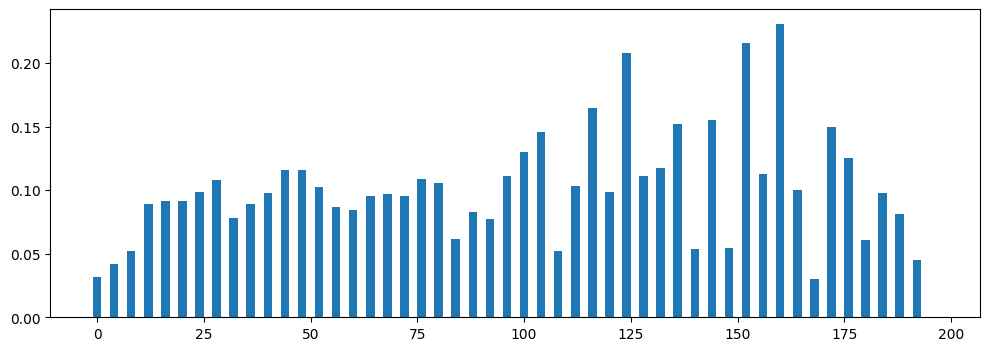

In [38]:
distance_range = (0,200)
bin_count = 50
width = (distance_range[1]-distance_range[0])/bin_count/2
death_count, bins = np.histogram(injury_df[injury_df["inj_level"]==1]["hospital_distance"], bins=bin_count, range=distance_range)
inj_count, _ = np.histogram(injury_df[injury_df["inj_level"].isin([1,2])]["hospital_distance"], bins=bin_count, range=distance_range)
plt.bar(bins[:-1],inj_count,width=width)
plt.show()
plt.bar(bins[:-1],death_count,width=width)
plt.show()
plt.bar(bins[:-1],death_count/inj_count,width=width)
plt.show()

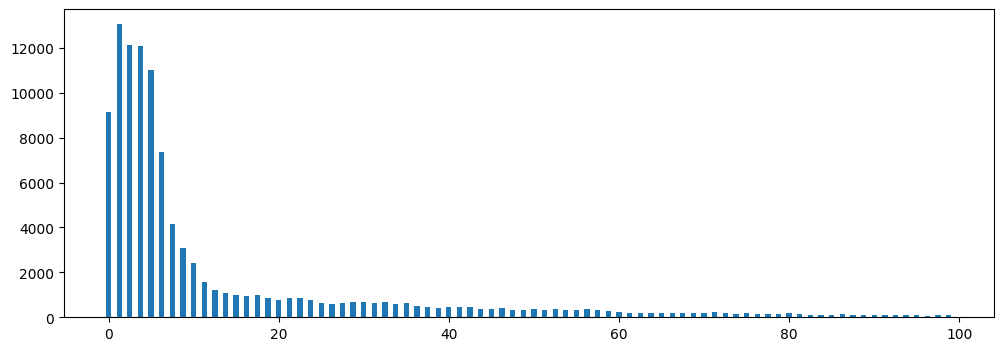

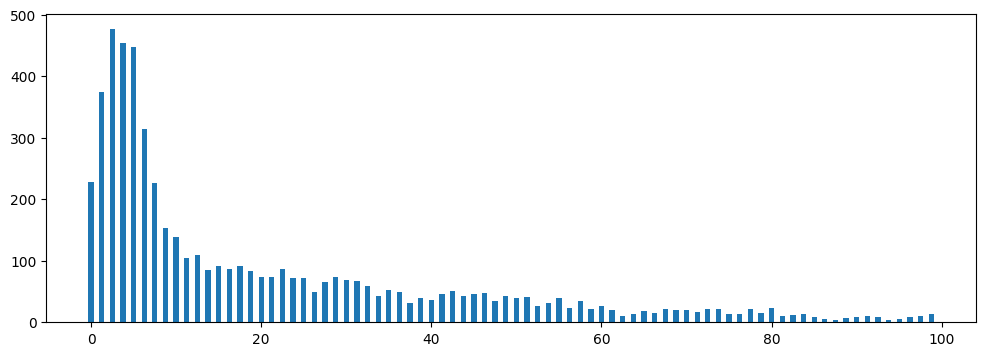

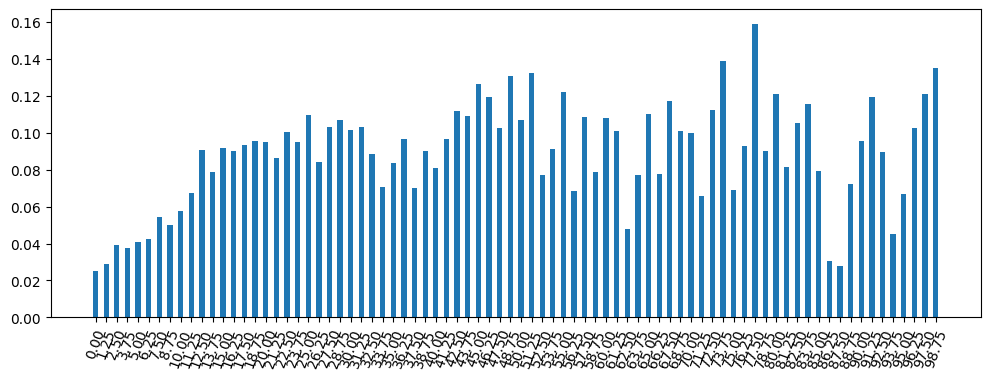

In [39]:
distance_range = (0,100)
bin_count = 80
width = (distance_range[1]-distance_range[0])/bin_count/2
death_count, bins = np.histogram(injury_df[injury_df["inj_level"]==1]["hospital_distance"], bins=bin_count, range=distance_range)
inj_count, _ = np.histogram(injury_df[injury_df["inj_level"].isin([1,2])]["hospital_distance"], bins=bin_count, range=distance_range)
plt.bar(bins[:-1],inj_count,width=width)
plt.show()
plt.bar(bins[:-1],death_count,width=width)
plt.show()
plt.bar(bins[:-1],death_count/inj_count,width=width)
plt.xticks(bins[:-1], rotation=70)
plt.show()

In [40]:
crash_coor_df = accident_df.join(node_df[["accident_no","lat","long"]].set_index("accident_no"), on="accident_no")[["accident_no","lat","long"]].dropna()
crash_coor_df = injury_df.join(crash_coor_df.set_index("accident_no")).dropna()
crash_coor_df

,inj_level,node_id,hospital_id,hospital_distance,lat,long
accident_no,,,,,,
12000000389,1,25264.0,3405.0,7.315271,-38.002110,145.142480
12000000554,2,42800.0,3425.0,5.015673,-37.965450,145.074530
12000000555,2,40101.0,10636.0,1.894277,-37.863140,144.980670
12000000559,2,127638.0,3425.0,2.375678,-37.944040,145.001310
12000000586,3,57539.0,3390.0,6.359619,-37.884550,145.067480
...,...,...,...,...,...,...
T20200018987,2,665599.0,3405.0,2.463386,-37.998038,145.212482
T20200019125,2,665832.0,12280.0,7.119641,-38.032257,145.268088
T20200019239,2,665835.0,2447.0,1.492807,-37.828081,144.983214


array([[145.86600158, -38.23158791],
       [143.96907709, -36.6508476 ],
       [146.82631075, -36.54796806],
       [142.26741801, -34.56688531],
       [144.49391381, -37.68992302],
       [142.094792  , -37.33212403],
       [145.39944893, -37.46335991],
       [145.43490946, -36.38404047],
       [147.84046002, -37.6862719 ],
       [143.53903284, -38.26941065]])

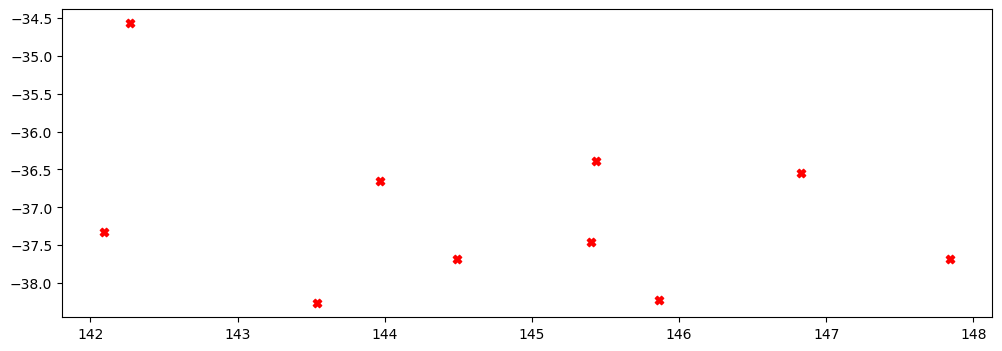

In [41]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0).fit(crash_coor_df[crash_coor_df["hospital_distance"]>12.5][["long", "lat"]])
display(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="r", marker="X")

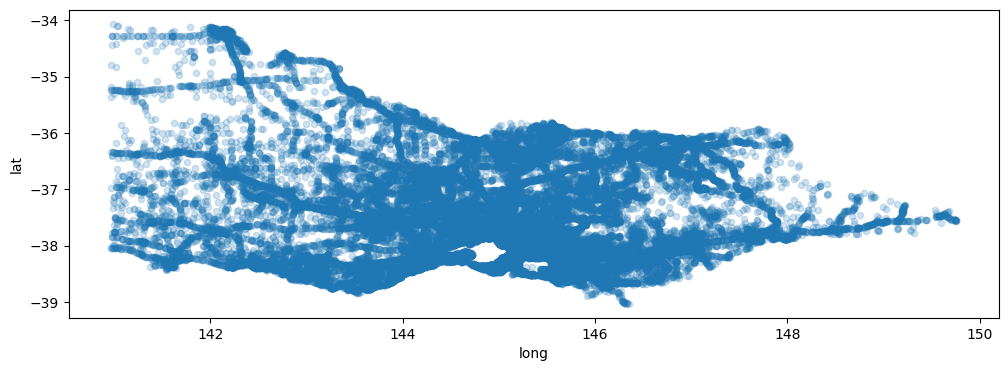

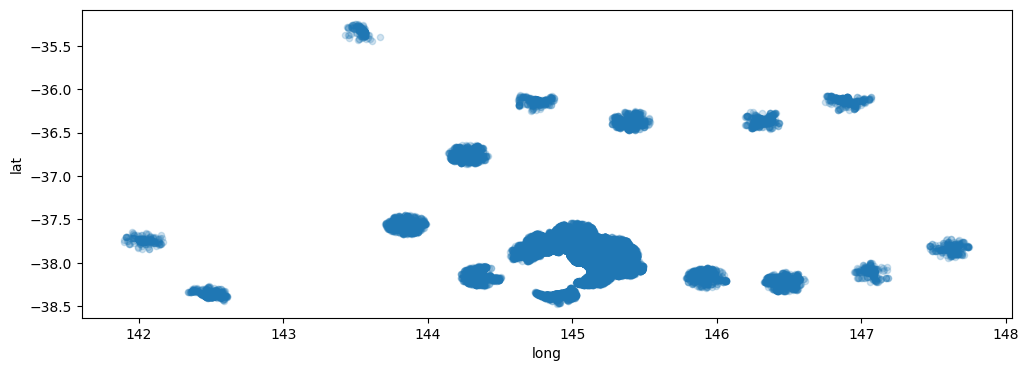

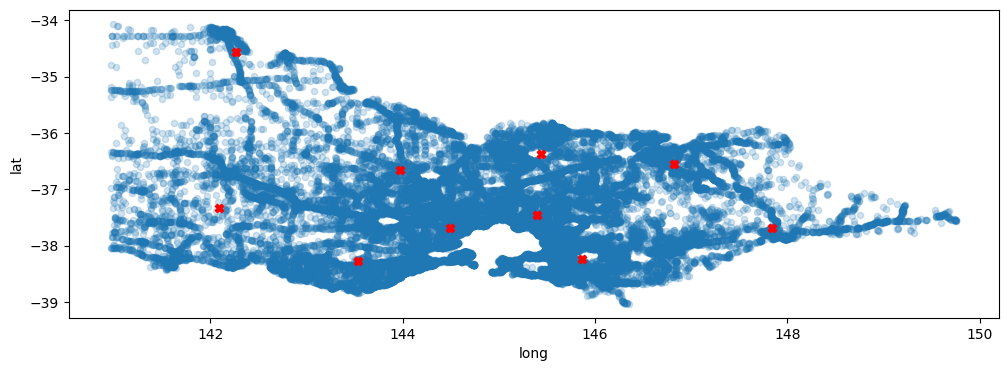

In [42]:
crash_coor_df.plot.scatter("long","lat",alpha=0.2)
plt.show()
crash_coor_df[crash_coor_df["hospital_distance"]<12.5].plot.scatter("long","lat",alpha=0.2)
plt.show()
crash_coor_df[crash_coor_df["hospital_distance"]>12.5].plot.scatter("long","lat",alpha=0.2)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="r", marker="X")
plt.show()

In [272]:
_df = pd.DataFrame()
_df["coordinate"] = [tuple(coor_pair) for coor_pair in kmeans.cluster_centers_[:,::-1]]
_df["hospital id"] = range(1, len(_df)+1)
_df["hospital id"] = _df["hospital id"]*-1
_df

,coordinate,hospital id
0,"(-38.288651246146195, 143.5941908570991)",-1
1,"(-38.03149782398383, 145.8676500926298)",-2
2,"(-36.625880155337526, 143.9338947039355)",-3
3,"(-36.58713759023062, 145.51141809891095)",-4
4,"(-34.491411418774575, 142.23907078065844)",-5
5,"(-36.59227682622075, 146.90192631836973)",-6
6,"(-37.48367984887258, 144.63876306223037)",-7
7,"(-37.96096149340438, 141.69351153008526)",-8
8,"(-37.62528556895879, 148.1039525516992)",-9
9,"(-36.79594954248823, 142.40356562238318)",-10


In [273]:
from tqdm import tqdm
tqdm.pandas(desc='Calculating distance to ER')
new_node_df = node_df
new_injury_df = injury_df
new_node_df[["hospital_id","hospital_distance"]] = new_node_df.progress_apply(lambda row: get_min_hospital_distance(row, hospital_df = _df), axis=1, result_type="expand")
new_node_df["hospital_id"] = new_node_df["hospital_id"].astype("int64")

Calculating distance to ER: 100%|█████████████████████████████████████████████| 192756/192756 [05:39<00:00, 568.12it/s]


In [297]:
new_injury_df = injury_df.join(new_node_df[["node_id","hospital_id","hospital_distance"]].set_index("node_id"), on="node_id", rsuffix="_new")

In [299]:
new_injury_df["min_hospital_distance"] = new_injury_df[["hospital_distance","hospital_distance_new"]].min(axis=1)

In [301]:
new_injury_df[new_injury_df["hospital_distance_new"] == new_injury_df["min_hospital_distance"] ]

,inj_level,node_id,hospital_id,hospital_distance,hospital_id_new,hospital_distance_new,min_hospital_distance
accident_no,,,,,,,
22000001269,1,181276.0,10567.0,156.696866,-10.0,90.279693,90.279693
22000001915,3,149942.0,10441.0,57.616845,-1.0,45.096099,45.096099
22000002385,2,52673.0,10567.0,100.277551,-10.0,44.088805,44.088805
22000002525,3,44852.0,7783.0,57.725527,-3.0,49.739672,49.739672
22000002794,1,70673.0,10567.0,77.154214,-8.0,44.700503,44.700503
...,...,...,...,...,...,...,...
T20200018213,2,60010.0,3292.0,56.765893,-7.0,50.509056,50.509056
T20200018321,2,664666.0,10582.0,43.918759,-7.0,14.832466,14.832466
T20200018398,2,665036.0,6802.0,87.803801,-6.0,72.105390,72.105390


In [290]:
new_node_df

,accident_no,node_id,node_type,amg_x,amg_y,lga_name,region name,deg urban name,lat,long,postcode no,vicgrid94_x,vicgrid94_y,lga_name_all,region_name,deg_urban_name,postcode_no,coordinate,hospital_id,hospital_distance
0,12000000389,25264,N,2512514.427,2388780.839,DANDENONG,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-38.002110,145.142480,3173.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-38.00211, 145.14248)",-2,63.762266
1,12000000554,42800,I,2506548.994,2392856.260,KINGSTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.965450,145.074530,3192.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.96545, 145.07453)",-7,65.841769
2,12000000555,40101,I,2498299.136,2404214.048,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Metropolitan Excluding CBD,-37.863140,144.980670,3182.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.86314, 144.98067)",-7,51.803479
3,12000000559,127638,N,2500115.047,2395234.944,BAYSIDE,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.944040,145.001310,3188.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.94404, 145.00131)",-7,60.271403
4,12000000586,57539,I,2505935.803,2401836.040,STONNINGTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.884550,145.067480,3145.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.88455, 145.06748)",-7,58.392247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326407,T20090046284,229107,N,NaN,NaN,WHITTLESEA,NaN,NaN,-37.676468,145.050491,NaN,2504453.781,2424931.347,WHITTLESEA,METROPOLITAN NORTH WEST REGION,MELB_URBAN,3082.0,"(-37.67646811, 145.0504909)",-7,42.195875
326408,T20090046106,229103,N,NaN,NaN,WHITTLESEA,NaN,NaN,-37.645401,144.991064,NaN,2499211.462,2428380.388,WHITTLESEA,METROPOLITAN NORTH WEST REGION,MELB_URBAN,3076.0,"(-37.64540054, 144.9910643)",-7,35.930039
326410,T20090047746,229114,N,NaN,NaN,BOROONDARA,NaN,NaN,-37.791877,145.093559,NaN,2508240.178,2412119.954,BOROONDARA,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,3104.0,"(-37.79187719, 145.0935586)",-7,52.739209
326411,T20090044445,229087,N,NaN,NaN,INDIGO,NaN,NaN,-36.092861,146.702041,NaN,2653269.886,2599283.209,INDIGO,NORTH EASTERN REGION,RURAL_VICTORIA,3688.0,"(-36.09286128, 146.7020407)",-6,58.250520


In [286]:
pd.concat([injury_df["hospital_distance"],new_node_df["hospital_distance"]],axis=1,ignore_index=True)

,0,1
12000000389,7.315271,NaN
12000000554,5.015673,NaN
12000000555,1.894277,NaN
12000000559,2.375678,NaN
12000000586,6.359619,NaN
...,...,...
326407,NaN,42.195875
326408,NaN,35.930039
326410,NaN,52.739209
326411,NaN,58.250520


In [276]:
new_injury_df["hospital_distance"] = pd.concat([injury_df["hospital_distance"],new_node_df["hospital_distance"]],axis=1).min(axis=1)
new_injury_df

,inj_level,node_id,hospital_id,hospital_distance
accident_no,,,,
12000000389,1,25264.0,3405.0,7.315271
12000000554,2,42800.0,3425.0,5.015673
12000000555,2,40101.0,10636.0,1.894277
12000000559,2,127638.0,3425.0,2.375678
12000000586,3,57539.0,3390.0,6.359619
...,...,...,...,...
T20200019239,2,665835.0,2447.0,1.492807
T20200019247,2,665912.0,10441.0,9.730209
T20200019250,2,226603.0,10214.0,5.778805


In [281]:
injury_df["hospital_distance"]!=new_injury_df["hospital_distance"]

ValueError: Can only compare identically-labeled Series objects

In [280]:
injury_df[injury_df["hospital_distance"]!=new_injury_df["hospital_distance"]]

,inj_level,node_id,hospital_id,hospital_distance
accident_no,,,,
12000013953,3,-3.0,NaN,NaN
12000031847,3,-3.0,NaN,NaN
12001029183,2,-3.0,NaN,NaN
12005040089,2,-3.0,NaN,NaN
22000011574,3,-3.0,NaN,NaN
...,...,...,...,...
T20200018260,2,666095.0,NaN,NaN
T20200018832,2,666042.0,NaN,NaN
T20200019069,2,665957.0,NaN,NaN


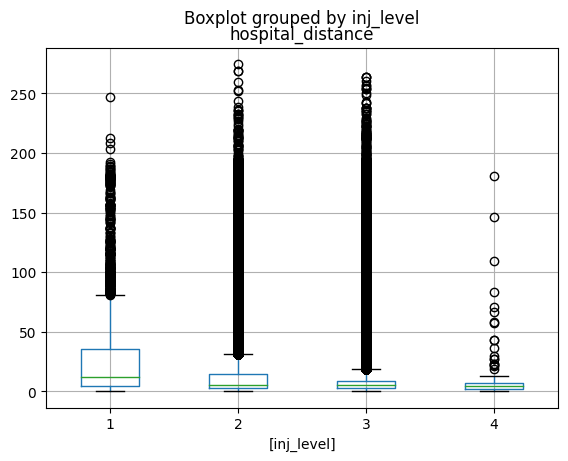

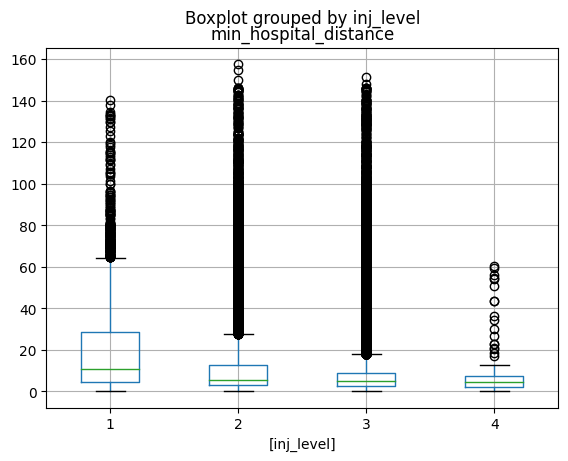

In [302]:
injury_df.boxplot(column=["hospital_distance"], by=["inj_level"])
plt.show()
new_injury_df.boxplot(column=["min_hospital_distance"], by=["inj_level"])
plt.show()

In [232]:
injury_df[["node_id","inj_level"]].join(new_node_df.set_index("node_id"), on ="node_id")[["inj_level","hospital_distance"]].dropna()

,inj_level,hospital_distance
accident_no,,
12000000389,1,97.749805
12000000554,2,98.651559
12000000555,2,97.103224
12000000559,2,101.561782
12000000586,3,92.809316
...,...,...
T20200019195,2,92.012914
T20200019239,2,94.565360
T20200019247,2,158.170907


<Axes: title={'center': 'hospital_distance'}, xlabel='[inj_level]'>

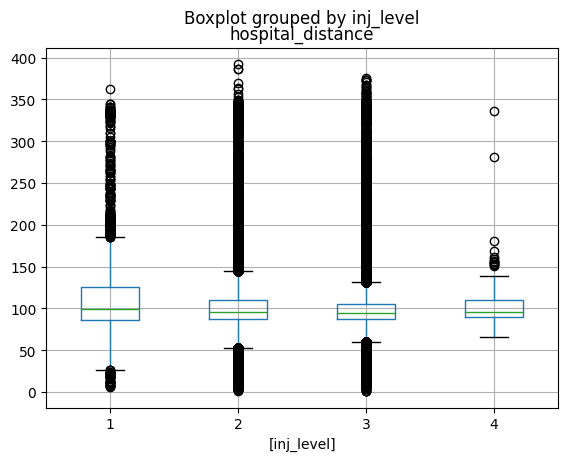

In [229]:
injury_df[["node_id","inj_level"]].join(new_node_df.set_index("node_id"), on ="node_id")[["inj_level","hospital_distance"]].boxplot(column=["hospital_distance"], by=["inj_level"])